## IMPORTING DEPENDENCIES

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import pywt
import numpy as np
import soundfile as sf

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
pip install pyhht

Note: you may need to restart the kernel to use updated packages.


In [37]:
#64,10,20,
audio = "D:/Work/VIT/Capstone Project/Data/Total Data/Marvin/marvin (10) AWGN.wav"
audio_data, sample_rate = librosa.load(audio)
wavelet = 'db4'
level = 4
coeffs = pywt.wavedec(audio_data, wavelet, level=level)
threshold = np.median(np.abs(coeffs[-level])) / 0.6745
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
denoised_audio = pywt.waverec(coeffs, wavelet)

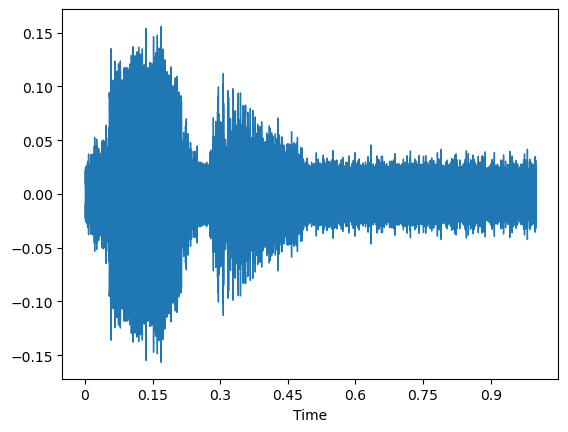

In [38]:
librosa.display.waveshow(audio_data)

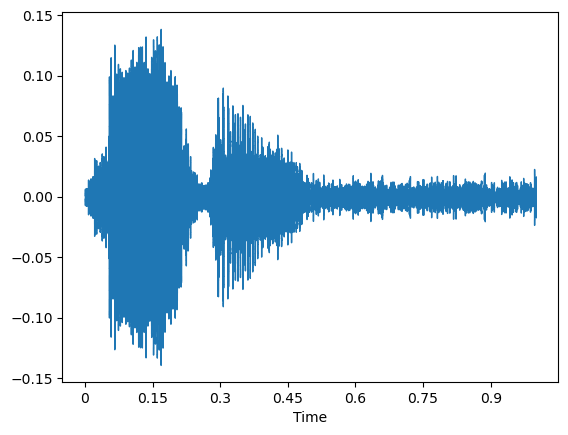

In [39]:
librosa.display.waveshow(denoised_audio)

In [70]:
# import libraries
import numpy as np
import soundfile as sf
from pyhht import EMD

# load audio data

signal, sr = sf.read(audio_file)

# define EMD parameters
n = 5  # number of decomposition levels

# perform EMD
emd = EMD(signal, n_imfs=13)
imfs = emd.decompose()
print(imfs.shape)




Mode 6, Iteration 600
0 minima > 0; 83 maxima < 0.
Mode 7, Iteration 800
0 minima > 0; 48 maxima < 0.
Mode 11, Iteration 1000
0 minima > 0; 5 maxima < 0.
(13, 16000)


In [79]:

# compute Hilbert transform energy of each IMF
freqs = np.fft.rfftfreq(signal.size, d=1/sr)
energies = []
for i in range(n):
    hilbert_transform = hilbert(imfs[i])
    amplitude_envelope = np.abs(hilbert_transform)
    energy = np.sum(np.square(amplitude_envelope))
    energies.append(energy)
freqs = abs(freqs)

# select IMFs with highest energy within frequency range of interest
min_freq = 50  # minimum frequency of interest
max_freq = 5000  # maximum frequency of interest
relevant_imfs = []
for i in range(n):
    if freqs[i] >= min_freq and freqs[i] <= max_freq:
        relevant_imfs.append(imfs[i])

In [80]:
print(relevant_imfs)

[]


In [ ]:
energy_ratios = np.array(energies) / np.sum(energies)
selected_imfs = []
for i in np.argsort(energy_ratios)[-len(relevant_imfs):]:
    selected_imfs.append(relevant_imfs[i])

# reconstruct signal
filtered_imfs = selected_imfs
reconstructed_signal = np.sum(filtered_imfs, axis=0)

# save reconstructed signal
sf.write('reconstructed_signal.wav', reconstructed_signal, sr)

In [47]:
print(imfs[0].shape)

(16000,)


In [91]:
import pywt
import numpy as np
import soundfile as sf

# Load the audio file
audio_data, sample_rate = sf.read(audio_file)

# Define the wavelet and level of decomposition
wavelet = 'db4'
level = 4

# Decompose the audio signal into wavelet coefficients
coeffs = pywt.wavedec(audio_data, wavelet, level=level)

# Create a threshold for the wavelet coefficients
threshold = np.median(np.abs(coeffs[-level])) / 0.6745

# Apply soft thresholding to the wavelet coefficients
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)

# Reconstruct the audio signal from the denoised wavelet coefficients
denoised_audio = pywt.waverec(coeffs, wavelet)
sf.write('/content/gdrive/MyDrive/Colab Notebooks/FYP/path_to_denoised_audio_file.wav', denoised_audio, sample_rate)
print(audio_data)
print(denoised_audio)

[-0.0007019  -0.00167847 -0.00085449 ...  0.00283813  0.00338745
  0.        ]
[-0.00123588 -0.00121536 -0.00119763 ...  0.00243875  0.00200836
  0.00140719]
